# MOwNiT - Całkowanie numeryczne

## Kwadratury Gaussa

Kwadratury Gaussa to metoda całkowania numerycznego polegająca na takim wyborze wag $w_{1},w_{2},\dots ,w_{n}$ i węzłów interpolacji $t_{1},t_{2},\dots ,t_{n}\in [a,b]$ aby wyrażenie

$$\sum _{i=1}^{n}w_{i}f(t_{i})$$

w przybliżeniu było równe całce

$$I(f)=\int \limits _{a}^{b}\omega(x)f(x)dx,$$

gdzie $f$ jest dowolną funkcją ciągłą na $[a,b]$ a $\omega$ jest pewną odpowiednio określoną nieujemną *funkcją wagową*.

Z twierdzenia Gaussa wynika, że dobrymi kandydatami na **węzły interpolacji** są miejsca zerowe wielomianów ortogonalnych. Otrzymujemy zatem następujące rodzaje kwadratur Gaussa:

### Kwadratury Gaussa-Legendre'a

$$I(f)=\int \limits _{-1}^{1}f(x)dx\approx \sum _{i=1}^{n}w_{i}f(t_{i}),$$

gdzie $t_{i}$ to pierwiastki $n$-tego *wielomianu Legendre’a* a funkcja wagowa to $\omega\equiv 1$.

### Kwadratury Gaussa-Czebyszewa

$$I(f)=\int \limits _{-1}^{1}f(x){\frac {dx}{\sqrt {1-x^{2}}}}\approx \sum _{i=1}^{n}w_{i}f(t_{i}),$$

gdzie $t_{i}$ to pierwiastki $n$-tego wielomianu Czebyszewa a funkcja wagowa to $w(x)={\frac {1}{\sqrt {1-x^{2}}}}$.

### Kwadratury Gaussa-Hermitte'a

$$I(f)=\int \limits _{-\infty }^{\infty }e^{-x^{2}}f(x)dx\approx \sum _{i=1}^{n}w_{i}f(t_{i}),$$

gdzie $t_{i}$ to pierwiastki $n$-tego wielomianu Hermite’a a funkcja wagowa to $w(x)=e^{-x^{2}}$.

### Kwadratury Gaussa-Laguerre’a

$$\displaystyle I(f)=\int \limits _{0}^{\infty }e^{-x}f(x)dx\approx \sum _{i=1}^{n}w_{i}f(t_{i}),$$

gdzie $t_{i}$ to pierwiastki $n$-tego wielomianu Laguerre’a a funkcja wagowa to $w(x)=e^{-x}$.

### Kwadratury Gaussa-Jacobiego

$$I(f)=\int \limits _{-1}^{1}(1-x)^{\alpha }(1+x)^{\beta }f(x)dx\approx \sum _{i=1}^{n}w_{i}f(t_{i}),$$
    
gdzie  $t_{i}$ to pierwiastki $n$-tego wielomianu Jacobiego a funkcja wagowa to $w(x)=(1-x)^{\alpha }(1+x)^{\beta }$.

We wszystkich rodzajach węzłów interpolacji optymalne **wagi** $w_{1},w_{2},\dots ,w_{n}$ otrzymujemy jako rozwiązania układu równań
 $$\left\{{\begin{matrix}p_{0}(t_{1})w_{1}+&\ldots &+p_{0}(t_{n})w_{n}=&\langle p_{0},p_{0}\rangle _{\omega}\\p_{1}(t_{1})w_{1}+&\ldots &+p_{1}(t_{n})w_{n}=&0\\\vdots &&\vdots &\vdots \\p_{n-1}(t_{1})w_{1}+&\ldots &+p_{n-1}(t_{n})w_{n}=&0\end{matrix}}\right.,$$
gdzie $p_j$ oznacza $j$-ty wielomian ortogonalny z odpowiedniej rodziny a iloczyn skalarny z wagą $\omega$ definiujemy jako
$$\langle f,g\rangle _{w}=\int \limits _{a}^{b}\omega(x)f(x)g(x)dx.$$

## Kwadratury Gaussa w `numpy`

W `numpy` mamy dostępne następujące rodzaje kwadratur o samotłumaczących się nazwach:
- `numpy.polynomial.legendre.leggauss(deg)`
- `numpy.polynomial.chebyshev.chebgauss(deg)`
- `numpy.polynomial.hermite.hermgauss(deg)`
- `numpy.polynomial.laguerre.laggauss(deg)`

Jedyne, co musimy podać to stopień `deg` wielomianu, a jako wynik otrzymamy dwie tablice *ndarray*:
- `x` zawierającą listę punktów $t_i$
- `y` zawierającą listę wag $w_i$

### Przykład.

Policzmy całkę $\int_{-1}^{1} x^2 dx$. Jest to typ całki pasujący do kwadratury Gaussa-Legendre'a:

In [28]:
import numpy as np
from numpy.polynomial.legendre import leggauss

n=2

t,w = leggauss(2)
calka = sum(w*t**2) #sum(wi*f(ti))

print(calka)

0.6666666666666666


### Zadanie 1 (1 pkt).

Dobierz odpowiednią kwadraturę i oblicz całki:
1. $\displaystyle\int_{-1}^1\frac{dx}{1+x^2}$
2. $\displaystyle\int_{0}^\infty\frac{\sin x}{x}dx$
3. $\displaystyle\int_{-\infty}^\infty\frac{dx}{2x^2-12x+36}$
4. $\displaystyle\int_{-1}^1\sqrt[3]{x}dx$

In [29]:
import numpy as np
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.laguerre import laggauss
from numpy.polynomial.hermite import hermgauss

# === Zadanie 1: obliczanie całek odpowiednimi kwadraturami Gaussa ===

# 1) ∫_{-1}^{1} 1 / (1 + x^2) dx
#    - Przedział: [-1, 1] → kwadratura Gauss-Legendre'a
n1 = 5  # liczba węzłów
t1, w1 = leggauss(n1)
f1 = lambda x: 1 / (1 + x**2)
I1 = np.sum(w1 * f1(t1))
print(f"1) ∫_(-1)^1 1/(1+x^2) dx ≈ {I1:.8f}   (dokładnie π/2 ≈ {np.pi/2:.8f})")

# 2) ∫_{0}^{∞} (sin x) / x dx
#    - Przedział: [0, ∞) → kwadratura Gauss-Laguerre’a
#    - Transformacja: ∫₀^∞ f(x) dx = ∫₀^∞ e^{-x} [e^x f(x)] dx
n2 = 50
t2, w2 = laggauss(n2)
f2 = lambda x: np.where(x == 0, 1.0, np.sin(x) / x) * np.exp(x)
I2 = np.sum(w2 * f2(t2))
print(f"2) ∫_0^∞ sin(x)/x dx ≈ {I2:.8f}   (teoretycznie π/2 ≈ {np.pi/2:.8f})")

# 3) ∫_{-∞}^{∞} 1 / (2x^2 - 12x + 36) dx
#    - Przedział: (-∞, ∞) → kwadratura Gauss-Hermite’a
#    - Transformacja: ∫_{-∞}^∞ f(x) dx = ∫_{-∞}^∞ e^{-x^2} [e^{x^2} f(x)] dx
n3 = 50
t3, w3 = hermgauss(n3)
f3 = lambda x: np.exp(x**2) / (2 * x**2 - 12 * x + 36)
I3 = np.sum(w3 * f3(t3))
print(f"3) ∫_(-∞)^∞ 1/(2x^2 - 12x + 36) dx ≈ {I3:.8f}")

# 4) ∫_{-1}^{1} x^(1/3) dx
#    - Przedział: [-1, 1] → kwadratura Gauss-Legendre'a
#    - Funkcja nieparzysta na symetrycznym przedziale → wynik ≈ 0
n4 = 5
t4, w4 = leggauss(n4)
f4 = lambda x: np.cbrt(x)
I4 = np.sum(w4 * f4(t4))
print(f"4) ∫_(-1)^1 x^(1/3) dx ≈ {I4:.2e}   (oczekiwane 0)")

1) ∫_(-1)^1 1/(1+x^2) dx ≈ 1.57117117   (dokładnie π/2 ≈ 1.57079633)
2) ∫_0^∞ sin(x)/x dx ≈ 1.37621316   (teoretycznie π/2 ≈ 1.57079633)
3) ∫_(-∞)^∞ 1/(2x^2 - 12x + 36) dx ≈ 0.41347495
4) ∫_(-1)^1 x^(1/3) dx ≈ 0.00e+00   (oczekiwane 0)


### Zadanie 2 (1 pkt).
Zobrazuj na przykładzie wybranej całki i wybranej kwadratury twierdzenie o stopniu dokładności kwadratury Gaussa.

Trzeba wziąć jakąś konkretną funkcję i konkretną kwadraturę Gaussa (np. Gaussa-Legendre’a), a następnie sprawdzić, że:  
	• kwadratura jest dokładna dla wielomianów do stopnia 2n-1,  
	• ale już niekoniecznie dla wielomianów wyższych stopni.  

Plan działania:  
	1.	Wybiorę kwadraturę Gaussa-Legendre’a na [-1, 1].  
	2.	Obliczę całki dokładne dla funkcji f(x) = x^k dla różnych k.  
	3.	Porównam wartości:  
	•	wynik całkowania numerycznego (kwadratura),  
	•	wynik całkowania dokładnego (analitycznie).  
	4.	Pokażę jak zmienia się błąd w zależności od stopnia wielomianu.  

Wybierzmy:  
n = 3 (czyli 3 węzły → kwadratura powinna być dokładna do 2n-1 = 5 stopnia).  
Funkcje testowe: x^0, x^1, x^2, x^3, x^4, x^5, x^6.  

Kwadratura Gaussa-Legendre'a z n=3 węzłami

   Stopień |       Dokładna całka |           Kwadratura |       Błąd
----------------------------------------------------------------------
         0 |         2.0000000000 |         2.0000000000 |   0.00e+00
         1 |         0.0000000000 |         0.0000000000 |   0.00e+00
         2 |         0.6666666667 |         0.6666666667 |   4.44e-16
         3 |         0.0000000000 |         0.0000000000 |   0.00e+00
         4 |         0.4000000000 |         0.4000000000 |   2.22e-16
         5 |         0.0000000000 |         0.0000000000 |   0.00e+00
         6 |         0.2857142857 |         0.2400000000 |   4.57e-02
         7 |         0.0000000000 |         0.0000000000 |   0.00e+00
         8 |         0.2222222222 |         0.1440000000 |   7.82e-02
         9 |         0.0000000000 |         0.0000000000 |   0.00e+00


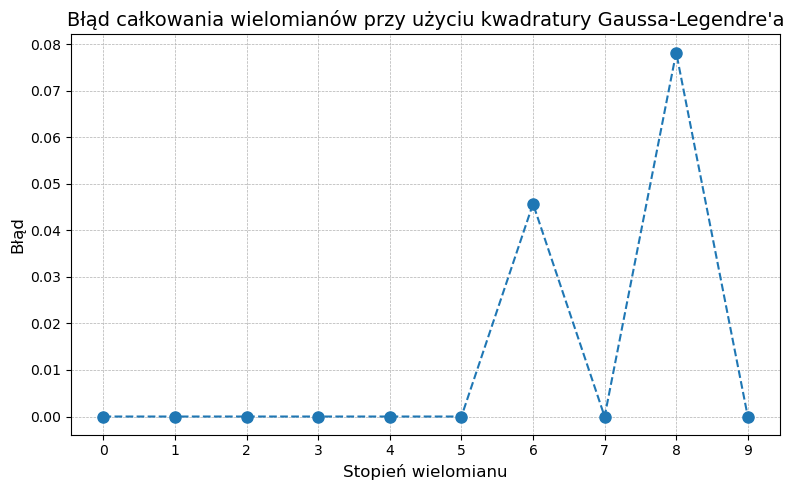

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from scipy.integrate import quad

# Parametry kwadratury
n = 3  # liczba węzłów

# Uzyskaj węzły i wagi kwadratury Gaussa-Legendre'a
t, w = roots_legendre(n)

# Funkcja pomocnicza - liczenie całki kwadraturą
def gauss_legendre_integrate(f, t, w):
    return np.sum(w * f(t))

# Funkcja testowa: wielomiany x^k
def poly_func(k):
    return lambda x: x**k

# Zakres testowanych stopni wielomianów
degrees = range(0, 10)

errors = []

print(f"Kwadratura Gaussa-Legendre'a z n={n} węzłami\n")
print(f"{'Stopień':>10} | {'Dokładna całka':>20} | {'Kwadratura':>20} | {'Błąd':>10}")
print("-"*70)

for k in degrees:
    f = poly_func(k)
    exact_integral, _ = quad(f, -1, 1)  # dokładna wartość całki
    approx_integral = gauss_legendre_integrate(f, t, w)  # wartość przez kwadraturę
    error = abs(exact_integral - approx_integral)

    errors.append(error)
    
    print(f"{k:>10} | {exact_integral:>20.10f} | {approx_integral:>20.10f} | {error:>10.2e}")

# Wykres błędów
plt.figure(figsize=(8, 5))
plt.plot(degrees, errors, marker='o', linestyle='--', markersize=8)
plt.xticks(degrees)
plt.title("Błąd całkowania wielomianów przy użyciu kwadratury Gaussa-Legendre'a", fontsize=14)
plt.xlabel("Stopień wielomianu", fontsize=12)
plt.ylabel("Błąd", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Na przykładzie funkcji f(x) = x^k dla k = 0,1, ... ,9 oraz kwadratury Gaussa-Legendre’a z n=3 węzłami zaobserwowano:  
	• Kwadratura Gaussa-Legendre’a dokładnie całkuje wszystkie wielomiany stopnia nie większego niż 2n-1=5, co potwierdzają praktycznie zerowe błędy dla k=0,1,2,3,4,5.  
	• Dla wielomianów stopnia wyższego niż 5  pojawiają się istotne błędy przy całkowaniu, co zgodne jest z teorią i pokazuje twierdzenie o stopniu dokładności kwadratury Gaussa.
	• Jednak dla funkcji nieparzystych na symetrycznym przedziale [-1,1] (np. x^7, x^9) błąd wynosi zero — nie dlatego, że kwadratura jest dokładna dla tych stopni, ale dlatego, że całka funkcji nieparzystej na takim przedziale zawsze wynosi dokładnie zero.  
	• Błędy dla k=6 oraz k=8 są znaczne, co pokazuje, że kwadratura traci dokładność dla wyższych stopni wielomianów.  

### Zadanie 3 (3 pkt).
Napisz własne funkcje całkujące -  w wybranym przedziale $(a,b)$ - metodami prostokątów, trapezów oraz metodą Simpsona. Porównaj dokładność swoich funkcji na przykładach z zadania 1 i porównaj ją z kwadraturami Gaussa.

In [31]:
import numpy as np
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.laguerre import laggauss
from numpy.polynomial.hermite import hermgauss

## obliczanie całek odpowiednimi kwadraturami Gaussa

# 1) ∫_{-1}^{1} 1 / (1 + x^2) dx
n1 = 5  # liczba węzłów
t1, w1 = leggauss(n1)
f1 = lambda x: 1 / (1 + x**2)
I1 = np.sum(w1 * f1(t1))
print(f"1) ∫_(-1)^1 1/(1+x^2) dx ≈ {I1:.8f}   (dokładnie π/2 ≈ {np.pi/2:.8f})")

# 2) ∫_{0}^{∞} (sin x) / x dx
n2 = 50
t2, w2 = laggauss(n2)
f2 = lambda x: np.where(x == 0, 1.0, np.sin(x) / x) * np.exp(x)
I2 = np.sum(w2 * f2(t2))
print(f"2) ∫_0^∞ sin(x)/x dx ≈ {I2:.8f}   (teoretycznie π/2 ≈ {np.pi/2:.8f})")

# 3) ∫_{-∞}^{∞} 1 / (2x^2 - 12x + 36) dx
n3 = 50
t3, w3 = hermgauss(n3)
f3 = lambda x: np.exp(x**2) / (2 * x**2 - 12 * x + 36)
I3 = np.sum(w3 * f3(t3))
print(f"3) ∫_(-∞)^∞ 1/(2x^2 - 12x + 36) dx ≈ {I3:.8f}")

# 4) ∫_{-1}^{1} x^(1/3) dx
n4 = 5
t4, w4 = leggauss(n4)
f4 = lambda x: np.cbrt(x)
I4 = np.sum(w4 * f4(t4))
print(f"4) ∫_(-1)^1 x^(1/3) dx ≈ {I4:.2e}   (oczekiwane 0)")

## własne funkcje całkujące + porównanie

def rectangle_rule(f, a, b, n):
    """Metoda prostokątów (środkowa)."""
    h = (b - a) / n
    result = 0
    for i in range(n):
        xi = a + h * (i + 0.5)
        result += f(xi)
    return result * h

def trapezoidal_rule(f, a, b, n):
    """Metoda trapezów."""
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        xi = a + i * h
        result += f(xi)
    return result * h

def simpson_rule(f, a, b, n):
    """Metoda Simpsona."""
    if n % 2 == 1:
        n += 1  # Simpson wymaga parzystego n
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n, 2):
        xi = a + i * h
        result += 4 * f(xi)
    for i in range(2, n-1, 2):
        xi = a + i * h
        result += 2 * f(xi)
    return result * h / 3

# === Zastosowanie własnych metod na przykładach ===
n_points = 1000  # liczba podziałów

# 1) ∫_{-1}^{1} 1/(1+x^2) dx
a1, b1 = -1, 1
true_value1 = np.pi / 2
rect1 = rectangle_rule(f1, a1, b1, n_points)
trap1 = trapezoidal_rule(f1, a1, b1, n_points)
simp1 = simpson_rule(f1, a1, b1, n_points)
print(f"\n1) ∫_(-1)^1 1/(1+x^2) dx")
print(f"Metoda prostokątów ≈ {rect1:.8f}, błąd = {abs(rect1 - true_value1):.2e}")
print(f"Metoda trapezów    ≈ {trap1:.8f}, błąd = {abs(trap1 - true_value1):.2e}")
print(f"Metoda Simpsona    ≈ {simp1:.8f}, błąd = {abs(simp1 - true_value1):.2e}")
print(f"Kwadratura Gaussa  ≈ {I1:.8f}, błąd = {abs(I1 - true_value1):.2e}")

# 4) ∫_{-1}^{1} x^(1/3) dx
a4, b4 = -1, 1
true_value4 = 0  # funkcja nieparzysta, całka powinna wyjść 0
rect4 = rectangle_rule(f4, a4, b4, n_points)
trap4 = trapezoidal_rule(f4, a4, b4, n_points)
simp4 = simpson_rule(f4, a4, b4, n_points)
print(f"\n4) ∫_(-1)^1 x^(1/3) dx")
print(f"Metoda prostokątów ≈ {rect4:.2e}, błąd = {abs(rect4 - true_value4):.2e}")
print(f"Metoda trapezów    ≈ {trap4:.2e}, błąd = {abs(trap4 - true_value4):.2e}")
print(f"Metoda Simpsona    ≈ {simp4:.2e}, błąd = {abs(simp4 - true_value4):.2e}")
print(f"Kwadratura Gaussa  ≈ {I4:.2e}, błąd = {abs(I4 - true_value4):.2e}")

1) ∫_(-1)^1 1/(1+x^2) dx ≈ 1.57117117   (dokładnie π/2 ≈ 1.57079633)
2) ∫_0^∞ sin(x)/x dx ≈ 1.37621316   (teoretycznie π/2 ≈ 1.57079633)
3) ∫_(-∞)^∞ 1/(2x^2 - 12x + 36) dx ≈ 0.41347495
4) ∫_(-1)^1 x^(1/3) dx ≈ 0.00e+00   (oczekiwane 0)

1) ∫_(-1)^1 1/(1+x^2) dx
Metoda prostokątów ≈ 1.57079649, błąd = 1.67e-07
Metoda trapezów    ≈ 1.57079599, błąd = 3.33e-07
Metoda Simpsona    ≈ 1.57079633, błąd = 0.00e+00
Kwadratura Gaussa  ≈ 1.57117117, błąd = 3.75e-04

4) ∫_(-1)^1 x^(1/3) dx
Metoda prostokątów ≈ -2.76e-16, błąd = 2.76e-16
Metoda trapezów    ≈ 1.25e-16, błąd = 1.25e-16
Metoda Simpsona    ≈ -5.51e-17, błąd = 5.51e-17
Kwadratura Gaussa  ≈ 0.00e+00, błąd = 0.00e+00
